<a href="https://colab.research.google.com/github/AleksaBot/Projects/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
df = web.DataReader('AAPL',data_source='yahoo',start='2020-10-06',end='2021-10-12')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-06,116.120003,112.250000,115.699997,113.160004,161498200.0,112.436829
2020-10-07,115.550003,114.129997,114.620003,115.080002,96849000.0,114.344551
2020-10-08,116.400002,114.589996,116.250000,114.970001,83477200.0,114.235260
2020-10-09,117.000000,114.919998,115.279999,116.970001,100506900.0,116.222473
2020-10-12,125.180000,119.279999,120.059998,124.400002,240226800.0,123.604996
...,...,...,...,...,...,...
2021-10-06,142.149994,138.369995,139.470001,142.000000,83221100.0,142.000000
2021-10-07,144.220001,142.720001,143.059998,143.289993,61732700.0,143.289993
2021-10-08,144.179993,142.559998,144.029999,142.899994,58718700.0,142.899994


Text(0, 0.5, 'Close Price USD')

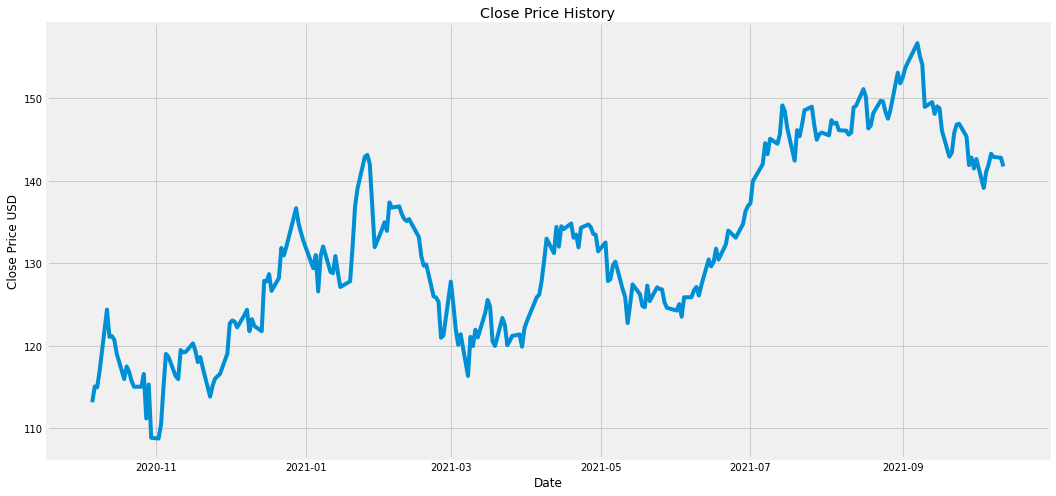

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD')


In [ ]:
data = df.filter(['Close'])
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.7)
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

training_data_len

180

In [ ]:
#Trainig data set
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()


[array([0.09161115, 0.13167789, 0.12938238, 0.17111861, 0.32616868,
       0.25730385, 0.25918206, 0.2491653 , 0.21389814, 0.15045922,
       0.1823874 , 0.16903183, 0.14565948, 0.13084315, 0.13105187,
       0.16339735, 0.05070952, 0.13668619, 0.00187821, 0.        ,
       0.03484987, 0.12896493, 0.21410686, 0.20701178, 0.1575543 ,
       0.15025049, 0.22370618, 0.21786313, 0.2189066 , 0.24060945,
       0.2216194 , 0.19323875, 0.20596831, 0.1788397 , 0.10601004,
       0.13355594, 0.15150253, 0.16318862, 0.21452431, 0.29111024,
       0.29862278, 0.29570125, 0.28130221, 0.31260437, 0.32575123,
       0.27149417, 0.30196159, 0.28464118, 0.27149417, 0.39878961,
       0.39732885, 0.41590146, 0.37333065, 0.40609342, 0.48226222,
       0.46306359, 0.48414027, 0.58263778, 0.54465767, 0.52065946])]
[0.4991653360603001]

[array([0.09161115, 0.13167789, 0.12938238, 0.17111861, 0.32616868,
       0.25730385, 0.25918206, 0.2491653 , 0.21389814, 0.15045922,
       0.1823874 , 0.16903183, 0.145

In [ ]:
#Convert the training variables to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
#Reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape


(120, 60, 1)

In [ ]:
#Build LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
120/120 [==============================] - 3s 28ms/step - loss: 0.0057
Epoch 2/5
120/120 [==============================] - 4s 31ms/step - loss: 0.0057
Epoch 3/5
120/120 [==============================] - 3s 26ms/step - loss: 0.0047
Epoch 4/5
120/120 [==============================] - 3s 27ms/step - loss: 0.0051
Epoch 5/5
120/120 [==============================] - 3s 26ms/step - loss: 0.0048


In [ ]:
#Create the testing data set
#Create a new array contaning scaled variables
test_data = scaled_data[training_data_len-60: , :]
#Create the data sets x and y
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])
#Convert the data to a numpy array
x_test = np.array(x_test)
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


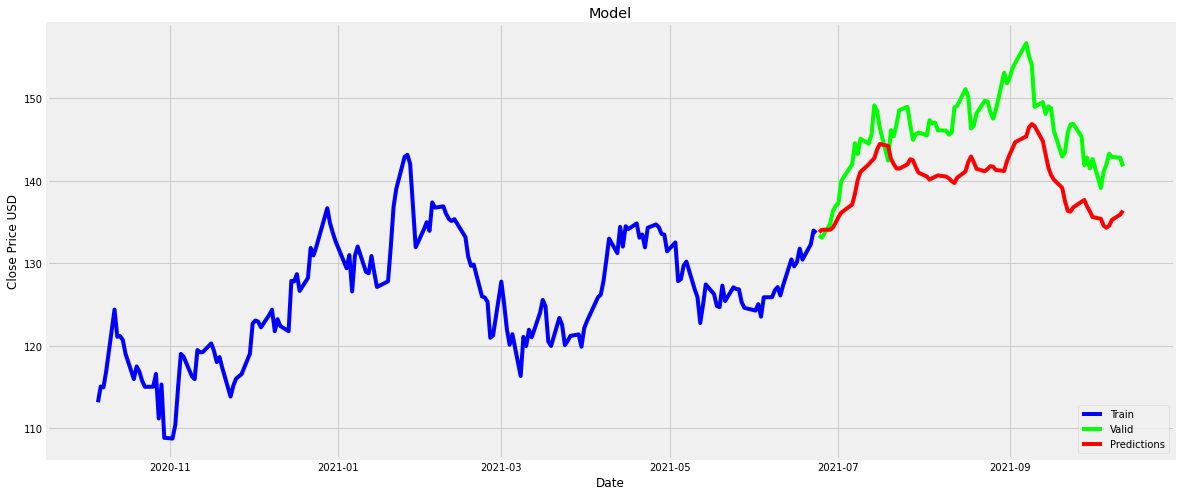

In [ ]:
#Plot data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions
#Visualize the data
plt.figure(figsize=(18,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train['Close'],'b')
plt.plot(valid['Close'],'lime')
plt.plot(valid['Predictions'],'red')               
plt.legend(['Train','Valid', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-06-20,31676.693359,38084.417969
2021-06-21,32505.660156,36418.574219
2021-06-22,33723.027344,34963.500000
2021-06-23,34662.437500,34124.343750
2021-06-24,31637.779297,33954.839844
...,...,...
2021-10-02,48199.953125,46787.687500
2021-10-03,49112.902344,48523.062500
2021-10-04,51514.812500,50060.503906
